# Análise de Séries Temporais em Python

## O que são Séries Temporais?

Séries Temporais são conjuntos de dados que são coletados, observados ou registrados em intervalos de tempo regulares ou irregulares. Esses dados são organizados em uma sequência temporal, o que significa que cada ponto de dado está associado a um momento específico no tempo. As séries temporais são usadas para analisar tendências, padrões e sazonalidades nos dados ao longo do tempo, bem como para prever eventos futuros com base nos dados históricos.

Séries Temporais são comuns em várias áreas, inclundo economia, finanças, meteorologia, ciências sociais e muitos outros campos. Alguns exemplos de séries temporais incluem:

- Preços diários de ações no mercado de ações.
- Número de vendas mensais de um produto específico.
- Temperatura média diária em uma cidade ao longo de um ano.
- Quantidade de chuva acumulada por hora durante um evento climático.

A análise de séries temporais envolve o uso de técnicas estatísticas e de aprendizado de máquina para identificar tendências, padrões e relações nos dados ao longo do tempo, bem como para prever eventos futuros com base nos dados históricos. Essas técnicas incluem decomposição de séries temporais, suavização exponencial, modelos autorregressivos, modelo de médias móveis, modelos ARIMA, técnicas de Inteligência Artificial, entre outras.

## Principais Técnicas de Análise de Séries Temporais

**Decomposição de Séries Temporais:** A decomposição é uma técnica que separa uma série temporal em seus componentes básicos, como tendência, sazonalidade e resíduos (ou ruído). Isso ajuda a entender melhor a dinâmica da série e facilita a modelagem e previsão.

**Médias Móveis:** As médias móveis são uma técnica de suavização que calcula a média um número fixo de pontos de dados consecutivos para criar uma nova série temporal suavizada. Isso ajuda a reduzir o ruído e identificar tendências de longo prazo.

**Suavização Exponencial:** A suavização exponencial é outra técnica de suavização que atribui pesos exponencialmente decrescentes aos pontos de dados anteriores. Isso dá mais importância aos dados anteriores. Isso dá mais importância aos dados mais recentes e ajuda a identificar tendências e padrões de curto prazo.

**Modelos Autorregressivos (AR):** Os modelos autorregressivos são modelos lineares que usam os valores passados da própria série temporal para prever valores futuros. O número de valores passados usados no modelo é chamado de ordem no modelo AR.

**Modelos de Médias Móveis (MA):** Os modelos de médias móveis são modelos lineares que usam os resíduos passados (erros de previsão) para prever valores futuros. O número de resíduos passados usados no modelo é chamado de ordem do modelo MA.

**Modelos ARIMA (Autoregressive Integrated Moving Avarage):** Os modelos ARIMA combinam elementos dos modelos AR e MA e também incluem a diferenciação para tornar a série temporal estacionária. Os modelos ARIMA são amplamente utilizados para previsão de séries temporais e podem lidar com tendências e sazonalidades.

**Modelos SARIMA (Seasonal ARIMA):** Os modelos SARIMA estendem os modelos ARIMA para incluir termos sazonais, tornando-os adequados para séries temporai com padrões sazonais claros.

**Modelos de Espaço de Estados:** Os modelos de espaço de estados são uma abordagem mais geral para modelar séries temporais que podem incluir modelos lineares e não lineares, bem como modelos com efeitos fixos e aleatórios. Exemplos de modelos de espaço de estados incluem modelos de suavização exponencial de Holt-Winters e modelos de Kalman.

**Métodos de Aprendizado de Máquina:** Além das técnicas estatísticas tradicionais, os métodos de aprendizado de máquina, como redes neutais, máquinas de vetores de suporte e árvores de decisão, também podem ser usados para modelar e prever séries temporais. Esses métodos geralmente requerem a transformação dos dados de séries temporais em um formato adequado para modelagem de aprendizado de máquina.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.4


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Carregando os Dados

In [3]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')

In [4]:
df.shape

(365, 2)

In [5]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [6]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
df.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


## Pré-Processamento dos Dados

In [8]:
# Valor mínimo da coluna data
df['Data'].min()

'2023-01-01'

In [9]:
# Valor máximo da coluna data
df['Data'].max()

'2023-12-31'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [13]:
# Converte a coluna de data no tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

In [14]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [16]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df.set_index('Data')['Total_Vendas']

In [17]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [18]:
df.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [20]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df.set_index('Data')['Total_Vendas']

In [21]:
type(serie_temporal)

pandas.core.series.Series

In [22]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [23]:
# Fornece a frequência da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

In [24]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Análise Exploratória

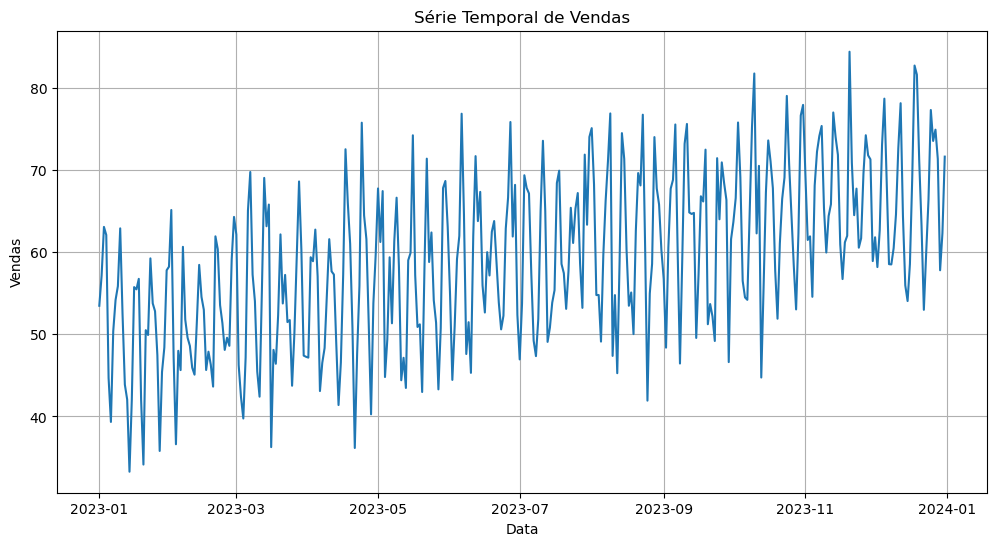

In [25]:
# Cria o gráfico da série temporal (sem formatação)
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()

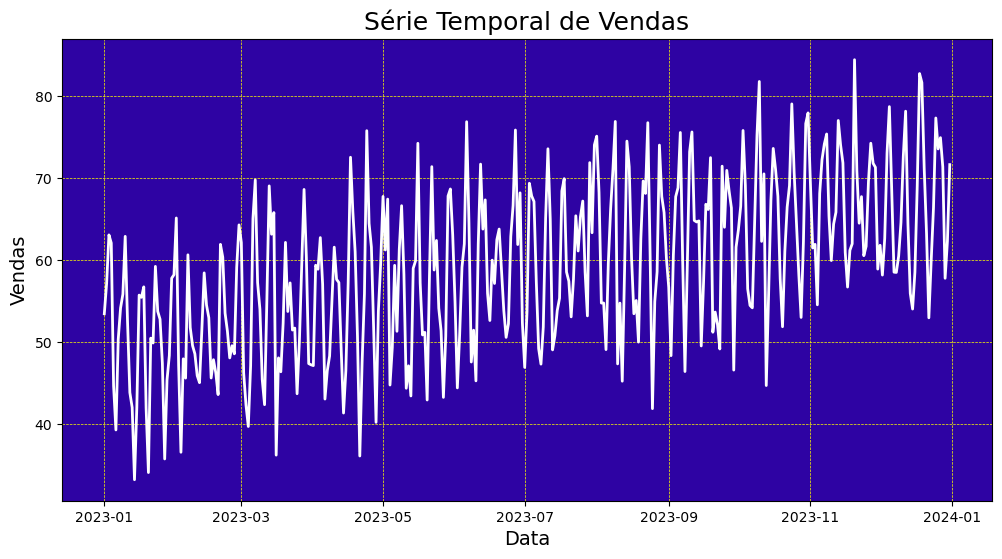

In [26]:
# Cria o gráfico da série temporal (com formatação)

# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = 'white', linewidth = 2)

# configurar cores e estilo do gráfico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color = 'black', fontsize = 14)
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()


## Suavização Exponencial

A suavização exponencial é uma técnica de análise e previsão de séries temporais que aplica médias ponderadas aos dados históricos, onde os pesos diminuiem exponencialmente à medida que os dados ficam mais antigos. A suavização exponencial é útil para lidar com tendências e sazonalidades nos dados, e para reduzir o ruído.

### Suposições da Suavização Exponencial

https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

No Statsmodels, a classe SimpleExpSmoothing é uma implementação de técnica de suavização exponencial simples, que é uma versão mais básica da suavização exponencial que não lida explicitamente com tendências e sazonalidades.

O modelo SimpleExpSmoothing do Statsmodels, também conhecido como suavização exponencial simples ou média móvel exponencialmente ponderada, é uma técnica de suavização de séries temporais que atribui pesos decrescentes exponencialmente aos pontos de dados passados. Ele é usado principalmente para suavizar séries temporais e fazer previsões de curto prazo. As principais suposições do modelo SimpleExpSmoothing são as seguintes:

- A série temporal é composta por um componente de nível (média) e um componente de erro aleatório (ruído). Não há componentes de tendência ou sazonalindade na série.

- O componente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado.

- O componente de erro aleatório é normalmente distribuído com média zero e variância constante. Além disso, os erros são independentes e identicamente distribuídos.

- O parâmetro de suavização (alfa) é uma constante entre 0 e 1, que determina a taxa de decaimento dos pesos. Valores próximos a 1 dão maior peso aos dados mais recentes, enquanto valores próximos a 0 dão mais peso aos dados mais antigos.

O modelo SimpleExpSmoothing é uma técnica de suavização bastante simples que tem suas limitações. Ele é mais adequado para séries temporais que não apresentam tendências ou sazonalidades claras e fazer previsões de curto prazo. Para séries temporais com componentes de tendência e/ou sazonalidade, modelos mais avançados como o ExponentialSmoothing de Holt-Winters ou modelos SARIMA podem ser mais apropriados.

In [33]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

A linha acima cria uma instância da classe SimpleExpSmoothing, utilizando a coluna 'Vendas' da série serie_temporal como entrada.

In [39]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2, optimized=False)

A linha acima faz uma chamada ao método fit() para ajustar o modelo de suavização exponencial aos dados. O argumento smoothing=0.2 define o parâmetro de suavização (alfa) como 0.2. O parâmetro de suavização controla a rapidez com que os pesos decrescem ao longo do tempo; um valor maior atribui mais peso aos dados mais recentes, enquanto um valor menor atribui mais peso aos dados mais antigos. O valor de alfa deve estar entre 0 e 1.

In [40]:
# Extrai os valores previstos prlo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

A linha acima extra os valores ajustados do modelo de suavização exponencial. Os valores ajustados são as estimativas da série temporal suavizada, que são calculadas aplicando os pesos exponenciais aos dados históricos. Esses vlaores ajustados podem ser usados para analisar a série temporal suavizada, identificar tendências e comparar com outras técnicas de suavização ou previsão.

O resultado final é uma nova série temporal chamada suavizacao_exponencial, que representa a versão suavizada da série original de vendas, com menos ruído e flutuações de curto prazo.

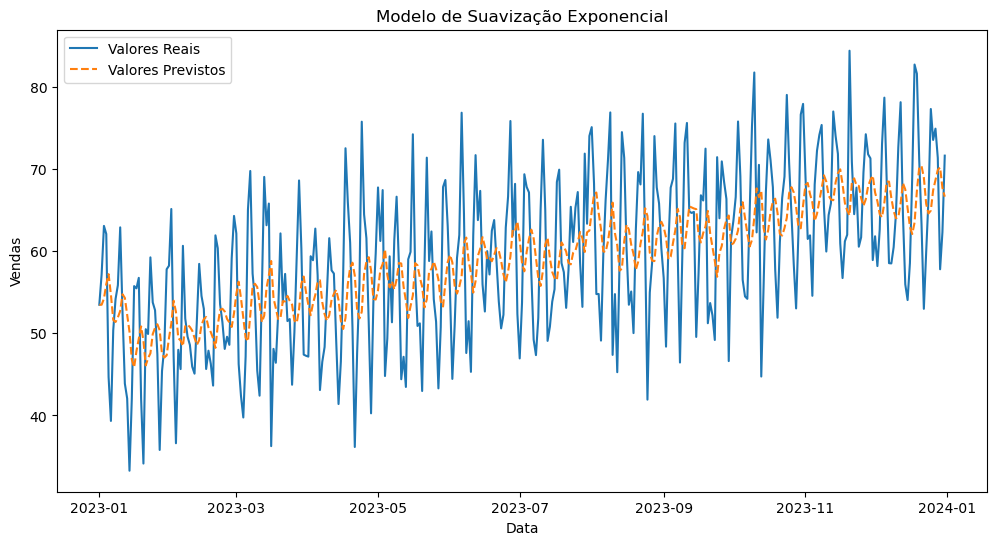

In [41]:
# Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

## Deploy e Previsão com o Modelo Treinado

In [42]:
# Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [43]:
print('Previsão do Total de Vendas para Janeiro/2024:', round(previsoes[0], 4))

Previsão do Total de Vendas para Janeiro/2024: 67.6499
